In [1]:
import nibabel as nib
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os


In [2]:
brainT1_1 = nib.load("/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI015-HH-1258-T1.nii.gz")

In [3]:
type(brainT1_1)

nibabel.nifti1.Nifti1Image

In [4]:
print(brainT1_1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     1.2000033  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'MR')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.48037913
quatern_c       : -0.52270734
quatern_d    

In [5]:
brainT1_1_data = brainT1_1.get_fdata()
print(type(brainT1_1_data))
print(brainT1_1_data.shape)

<class 'numpy.ndarray'>
(256, 256, 150)


In [6]:
brainT1_1_data[:,155,:].shape

(256, 150)

In [7]:
(256-150)/2


53.0

In [8]:
type(brainT1_1_data)

numpy.ndarray

Visualising a slice of the brain

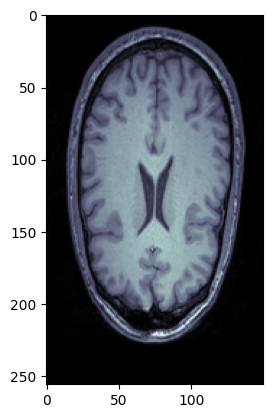

In [9]:
plt.imshow(ndi.rotate(brainT1_1_data[:,155,:], 180), cmap='bone')
# plt.axis('off')
plt.show()

In [10]:
import cv2

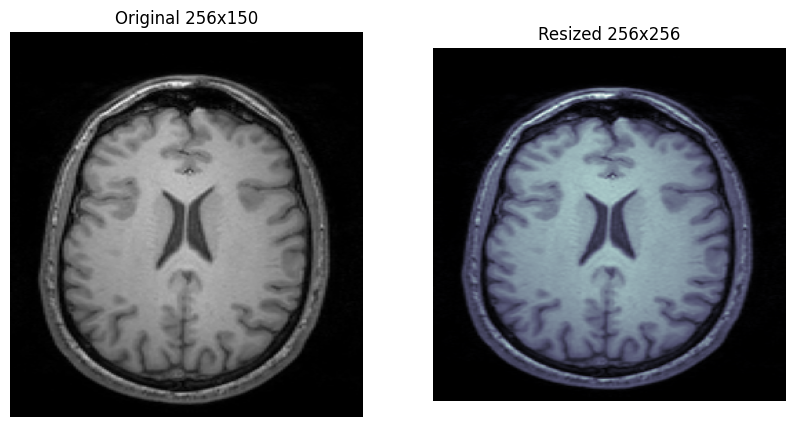

In [11]:
#  Example: Creating a random 256x150 array
# original_array = np.random.rand(256, 150)

# Resize using OpenCV (cv2.INTER_LINEAR is good for smooth resizing)
resized_array = cv2.resize(brainT1_1_data[:,155,:], (256, 256), interpolation=cv2.INTER_LINEAR)

# Display original and resized arrays
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(brainT1_1_data[:,155,:], cmap="gray", aspect="auto")
plt.title("Original 256x150")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resized_array, cmap="bone")
plt.title("Resized 256x256")
plt.axis("off")

plt.show()


In [16]:
resized_array.shape

(256, 256)

0
16
32
48
64
80
96
112
128
144
160
176
192
208
224
240


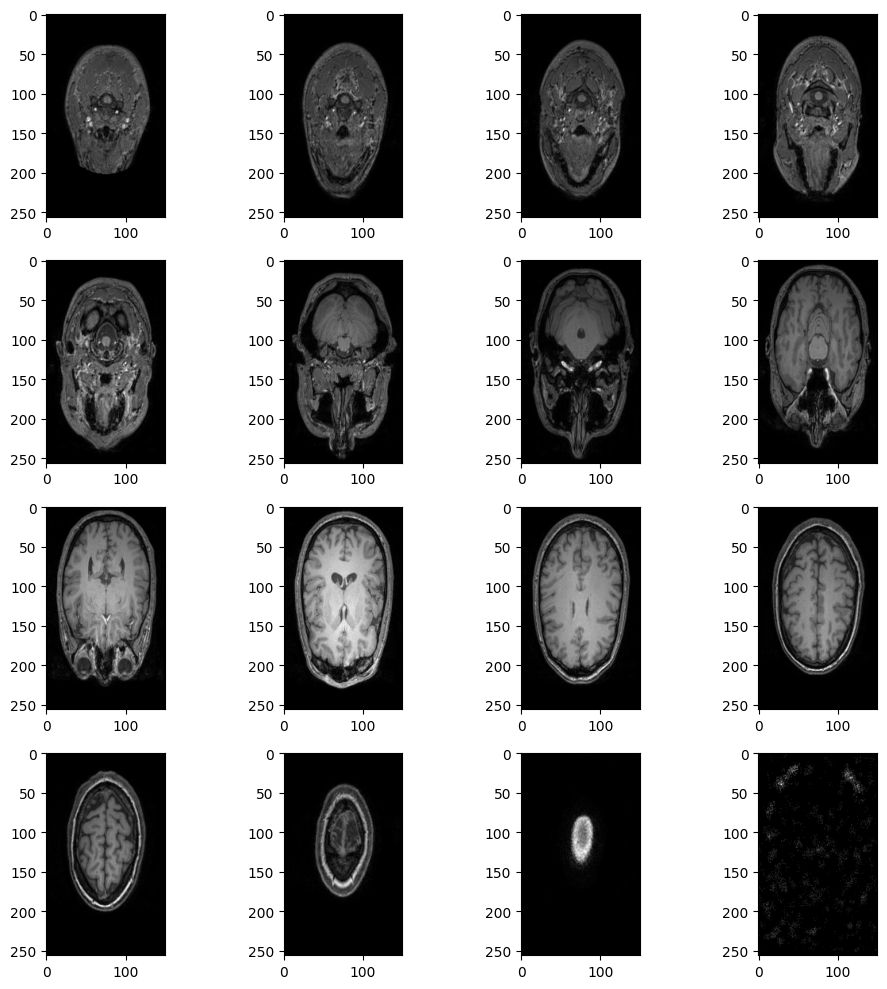

In [17]:
brain_vol_data = brainT1_1_data
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    print(img)
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[:, img, :], 180), cmap='gray')
    # axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [10]:
brainT1_1_data.shape

(256, 256, 150)

In [11]:
import numpy as np

In [12]:
affine = np.eye(4)  # Identity matrix for affine; adjust if you have specific spatial information
nifti_img = nib.Nifti1Image(brainT1_1_data, affine)

# # Save the NIfTI image to a file if needed
# nib.save(nifti_img, 'output_image.nii')

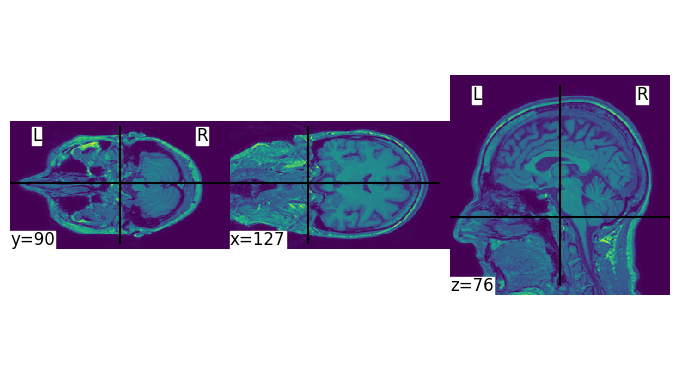

In [13]:
from nilearn import plotting

plotting.plot_img(nifti_img)
plt.show()

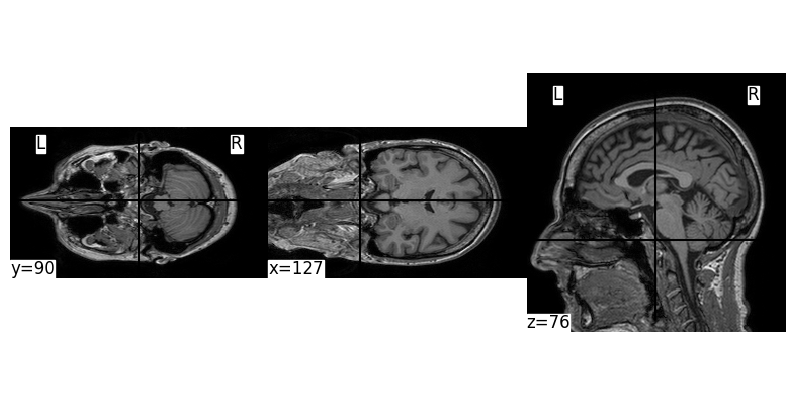

In [14]:
fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(nifti_img, cmap='gray', axes=ax)
plt.show()

In [15]:
nifti_img.shape

(256, 256, 150)

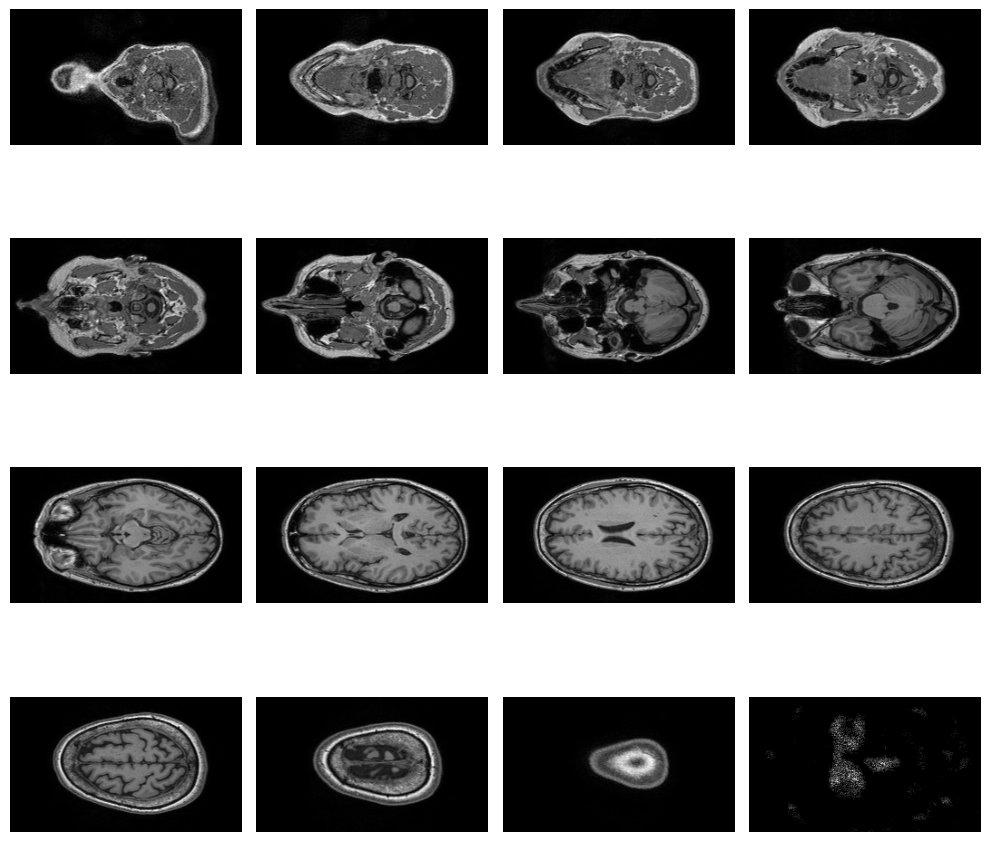

In [33]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load your 3D brain data array
brain_vol_data = nifti_img.get_fdata()  # Access the data as a NumPy array
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[1]  # Assuming slices are along the third axis

# Set up steps for slicing through the volume
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

# Create a subplot grid
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

# Loop through selected slices and plot them
for idx, img in enumerate(range(start_stop, start_stop + plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[:,img,:], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()


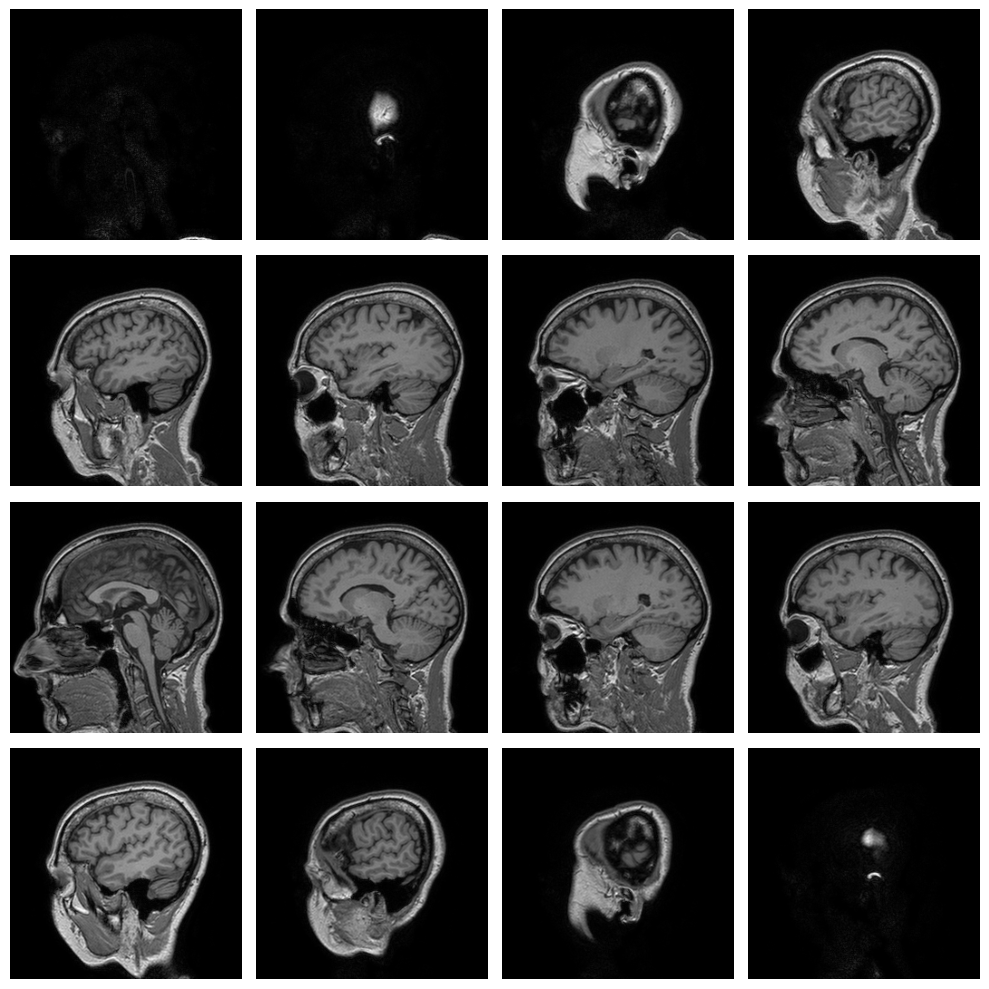

In [34]:
# Load your 3D brain data array
brain_vol_data = nifti_img.get_fdata()  # Access the data as a NumPy array
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[2]  # Assuming slices are along the third axis

# Set up steps for slicing through the volume
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

# Create a subplot grid
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

# Loop through selected slices and plot them
for idx, img in enumerate(range(start_stop, start_stop + plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[:,:,img], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()